<a href="https://colab.research.google.com/github/tonybanjo2001/BAN6430_Module_5/blob/main/Milestone_Assignment_2_Principal_Component_Analysis_Module_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Milestone Assignment 2: Principal Component Analysis**#

As a Data analyst at the Anderson Cancer Center, you are tasked with developing a model to address the growing number of referrals at the center. This model's first step is to identify essential variables for securing donor funding. After consulting with your team, Principal Component Analysis (PCA) has been chosen as the most suitable technique for this task.


**Assignment Description**
In this assignment, you will perform the following tasks:


**PCA Implementation:**
Utilize PCA to demonstrate how essential variables can be acquired from the cancer dataset available from sklearn.datasets.


**Dimensionality Reduction:**
Reduce the dataset into 2 PCA components for the project.


**Bonus Point (Optional):**
Implement logistic regression for prediction.







**Assignment Instructions**
To successfully complete this assignment, follow these steps:

Implement PCA using the cancer dataset from sklearn.datasets.

Reduce the dataset into 2 PCA components.

Optionally, implement logistic regression for prediction to earn bonus points.

Submit your work as a zipped file or a link to your GitHub repository. Include a README file with comprehensive instructions.

In [19]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

Loading and preprocessing the Dataset

In [20]:
# Load breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target
target_names = data.target_names

In [30]:
from IPython.display import display

# Style the tail of the dataset
styled_head = df_head.style.set_properties(**{
    'background-color': 'lightgrey',
    'color': 'black',
    'border-color': 'white'
})

display(styled_head)

,PC1,PC2,target
0,9.192837,1.948583,malignant
1,2.387802,-3.768172,malignant
2,5.733896,-1.075174,malignant
3,7.122953,10.275589,malignant
4,3.935302,-1.948072,malignant


In [27]:
from IPython.display import display

# Style the tail of the dataset
styled_tail = df_tail.style.set_properties(**{
    'background-color': 'lightgrey',
    'color': 'black',
    'border-color': 'white'
})

display(styled_tail)


,PC1,PC2,target
564,6.439315,-3.576817,malignant
565,3.793382,-3.584048,malignant
566,1.256179,-1.902297,malignant
567,10.374794,1.672010,malignant
568,-5.475243,-0.670637,benign


In [21]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Performing PCA

In [22]:
# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [23]:
# Created a DataFrame with PCA components
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['target'] = y
df_pca['target'] = df_pca['target'].map({0: target_names[0], 1: target_names[1]})

Plotting PCA Components

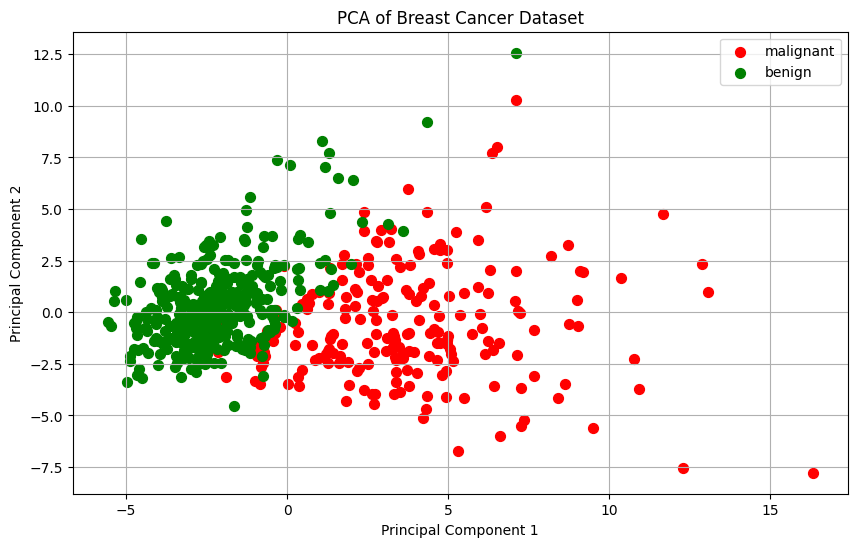

PCA performed and plotted successfully.


In [24]:
# Plot PCA components
plt.figure(figsize=(10, 6))
targets = target_names
colors = ['r', 'g']
for target, color in zip(targets, colors):
    indicesToKeep = df_pca['target'] == target
    plt.scatter(df_pca.loc[indicesToKeep, 'PC1'],
                df_pca.loc[indicesToKeep, 'PC2'],
                c=color, s=50, label=target)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA of Breast Cancer Dataset')
plt.grid()
plt.show()

print("PCA performed and plotted successfully.")

Malignant: Relating to tumors or malignant cells capable of invading nearby tissue and spreading to other areas of a person's body. A malignant tumour is dangerous, however, and must be treated by a doctor.
Benign: Relating to tumors or non-cancerous cells that do not spread to other parts of the body. Even though benign tumours are harmless, the position and size might still need medical treatment.

The following scatter plot shows the data points from the PCA-derived principle components, that is, PC1 and PC2, for the breast cancer dataset. Every point in the plot corresponds to a sample of a tumor. The class label colors used for benign and malignant are green and red, respectively. How the two classes are separated can be understood in the plot as follows:
Since the classes are well-separated in the plot, one could conclude that the principal components do a fine job of distinguishing between benign and malignant tumors.
On the other hand, looking at the graph, some groups overlap or are not very well defined at all; this makes it seem like primary components may not turn out to be able to tell between the benign and malignant tumors based on the provided information.

It could be that more characteristics are needed to have a more effective separation or that this data set is hard to separate.

The direction and the dispersion of the data points along the major components will inform about the variance of the data in such dimensions. The larger the gap between plot points, the higher may be the variance along those main components.


In [13]:
# Interpretation of reduction
explained_variance_ratio = pca.explained_variance_ratio_
print("\nInterpretation of Reduction:")
print("Explained Variance Ratio (PC1, PC2):", explained_variance_ratio)



Interpretation of Reduction:
Explained Variance Ratio (PC1, PC2): [0.44272026 0.18971182]


PC1 contributes 44.27% of the total variance, thus holding the most information from the original features.
PC2 explains 18.97% of the total variance, revealing more variability that was not captured by PC1.
This makes it that, together, PC1 and PC2 already capture 63.24% of the total variance, making the reduction in dimensionality meaningful.
As shown in the PC1 and PC2 plot, malignant and benign tumors are clearly separated, hence showing that these principal components capture important patterns in the data, although with lateral overlap at the meet point.

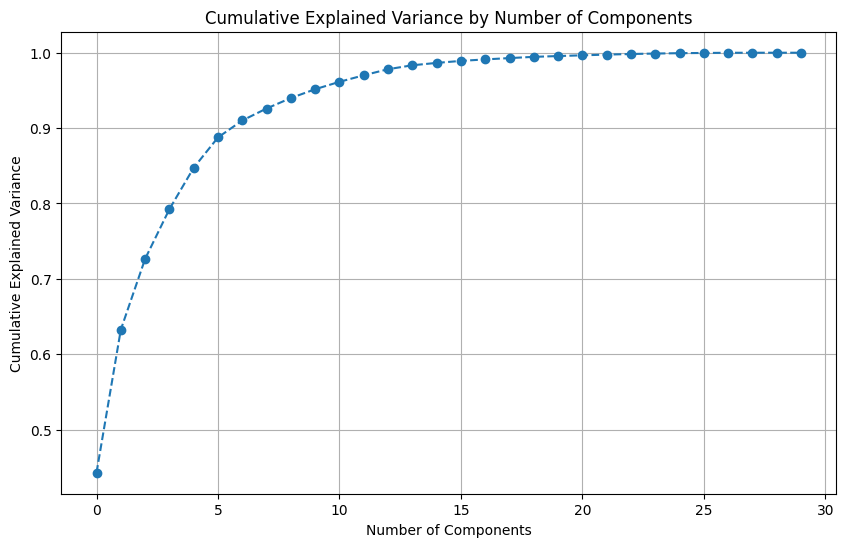

In [16]:
# Cumulative explained variance
pca_full = PCA().fit(X_scaled)
cumulative_explained_variance = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Number of Components')
plt.grid()
plt.show()


Explanation:
Cumulative explained variance helps us understand how much of the total variance in the dataset is captured by each principal component. The goal of PCA is to reduce the dimensionality of the data while retaining as much information as possible.


Insight:

The plot will show how many principal components are needed to explain a certain percentage of the variance.

For instance, if the first 2 components explain 95% of the variance, it means that using just these 2 components, we retain most of the information in the data.

Impact: If a small number of components explain a large percentage of the variance, it confirms that PCA is effective in reducing the dimensionality without losing much information. This can simplify modeling and improve computational efficiency.


# **Using PCA Components for Logistic Regression**

**I also performed Hyperparameter Tuing and Confusion Matrix**

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Implement Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("\nLogistic Regression Results:")
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)



Logistic Regression Results:
Accuracy: 0.9912280701754386
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



Accuracy: The model correctly classified about 99.12% of the breast cancer samples. Precision:

Class 0 (benign): All the samples predicted as benign are actually benign, hence 100% precision. Class 1 (malignant): About 99% of samples predicted as malignant are actually malignant.

Recall or Sensitivity: Class 0: Of the actual benign samples, about 98% were rightly identified by the model. Class 1: The model correctly identified all malignant samples; hence, the recall is 100%.

F1-score: Class 0: The F1-score, the average of precision and recall, comes out to be around 99%. Class 1: It is also around 99%.

Support: Class 0: There actually are 43 benign examples. Class 1: There actually are 71 malignant examples.

Macro avg and weighted avg: Macro avg: Average of precision, recall, and F1-score without considering class balance. Weighted avg: Average of precision, recall, and F1-score considering class balance as the weight.

The overall performance of the logistic regression model for the classification of breast cancer samples is very good, since the values of accuracy, precision, recall, and F1-score are high in both classes.

In [31]:
#Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

# Define parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Perform grid search
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

# Train logistic regression with best parameters
logistic_model_best = LogisticRegression(**best_params)
logistic_model_best.fit(X_train, y_train)

# Evaluate the tuned model
y_pred_best = logistic_model_best.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
classification_rep_best = classification_report(y_test, y_pred_best)

print("\nTuned Logistic Regression Results:")
print("Accuracy:", accuracy_best)
print("Classification Report:\n", classification_rep_best)


Best Parameters: {'C': 0.1, 'solver': 'liblinear'}
Best Cross-Validation Score: 0.9406593406593406

Tuned Logistic Regression Results:
Accuracy: 0.9912280701754386
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


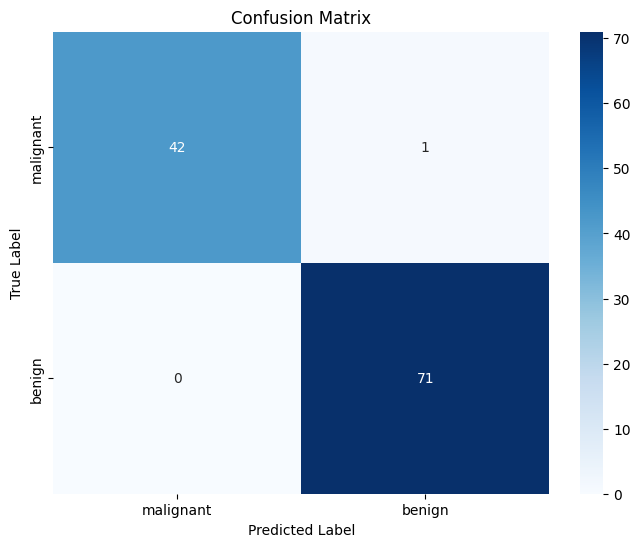

In [17]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


A confusion matrix provides a detailed breakdown of the classifier's performance, showing the counts of true positives, true negatives, false positives, and false negatives.

Insight:

The confusion matrix will show how many of the actual positive and negative cases were correctly or incorrectly classified.

**Impact**: By analyzing the numbers, we can identify whether the model has a higher rate of false positives or false negatives, which is crucial for understanding model performance and areas of improvement else it indicates a need for better model tuning to reduce false alarms.